# Week 3 Problem 2

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

5. When you are ready to submit your assignment, go to Dashboard → Assignments and click the Submit button. Your work is not submitted until you click Submit.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. If your code does not pass the unit tests, it will not pass the autograder.



# Due Date: 6 PM, February 05, 2018


In [1]:
# Set up Notebook
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
import patsy as pts 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from numpy.testing import assert_array_equal, assert_array_almost_equal
from pandas.util.testing import assert_frame_equal, assert_index_equal
from nose.tools import assert_false, assert_equal, assert_almost_equal, assert_true, assert_in, assert_is_not

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')
import math
def confusion(test, predict, names, bins=3, title='Confusion Matrix'):

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=names, columns=names )
    
    # Display heatmap and add decorations
    sns.set(font_scale=1.5)
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    
    sns.set(font_scale=2.0)
    hm.axes.set_title(title)
    hm.axes.set_xlabel('Predicted')
    hm.axes.set_ylabel('Actual')
    sns.set(font_scale=1.0)

    return None


# Breast Cancer Dataset

For first 2 problems, we will be using the built-in dataset about breast cancer and the respective information on indivudal breast cancer cases. This dataset has 569 samples and a dimensionality size of 30. We will be using only the 1st 10 features in order to create a Gradient Boosting model that will predict whether the individual case is either malignant (harmful) or benign (non-harmful).

The following code below imports the dataset as a pandas dataframe and previews a few sample data points. It also concatenates a column called classification which contains whether the record was determined to be a malignant or benign tumor. Note: In this dataset, a malignant tumor has a value of 0 and a benign tumor has a value of 1



In [2]:
# Load in the dataset as a Pandas DataFrame

data = load_breast_cancer()
cancer_data = pd.DataFrame(data.data, columns=data.feature_names)
cancer_data['target'] = data.target
# View the label distribution
print(cancer_data.target.value_counts(ascending=True))

features = cancer_data[cancer_data.columns[:10]]
labels = cancer_data.target
# Count the number of features
print("Number of features:", len(features.columns))

test_frac = 0.5
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=test_frac, random_state=40)



0    212
1    357
Name: target, dtype: int64
Number of features: 10



# Problem 1


In the code cell below do the following:

- Create a function for building a Gradient Boosting model using sci-kit learn to classify the Tumour as malignant(0) or benign(1).<br>

- Fit your model on the training features and labels (which are stored in X_train and y_train).


In [3]:
def GBM(shrinkage, trees, max_features):
    
    '''
    Create and fit a Gradient Boosting Classification model on training set using random_state=40 and 
    learning_rate,n_estimators and max_features as a parameters.

    Parameters
    ----------
    shrinkage : learning rate
    trees : number of trees to be constructed
    max_features : maximum number of features to be used at each split
    
    Returns
    -------
    A Gradient Boosting Classification model 

    '''

    # YOUR CODE HERE
    gbtc = GradientBoostingClassifier(n_estimators=trees, learning_rate=shrinkage, max_features=max_features,\
                                         random_state=40)
    gbtc = gbtc.fit(X_train, y_train)
    return gbtc

    

In [4]:
gbtc = GBM(0.01,500,5)

assert_equal(isinstance(gbtc, GradientBoostingClassifier), True)
assert_equal(gbtc.learning_rate, 0.01)
assert_equal(gbtc.max_features, 5)
assert_equal(gbtc.n_estimators, 500)




# Problem 2

By default, predict function classifies a tuple to the class that has probability > 0.5.

Sometimes, there is a need to change the cut-off probability value to reduce the number of False-Positives/False-Negatives (Eg. While classifying an Email as Spam or non-spam, we don't want to mis-classify an email as Spam as it may contain important information.)

In the code cell below, create a method which when called upon, can return the predicted class based on the cut-off that can be passed as parameter.<br>


In [5]:
def prediction(model, data, cutoff):
    '''
    1. Using predict_proba function, predict the probability of each class.
    2. If the value of probability<cutoff, classify it as Benign Tumor else malignant tumor.

    Parameters
    ----------
    model : Gradient boosting model created using GBM method.
    data : Data set on which the model should be built 
    cutoff : cutoff value 

    Returns
    -------
    A numpy array with the predicted values for the given data set.
    
    The solution should be a numpy array with the values either 0 or 1(based on the predictions).
    
    Sample Output
    -------------
    array([1, 0, 1, 1, 0, 1, 1])
    - For cut-off value 0.5, the returned array should match the output given by -- gbtc.predict(X_test). 
    Although this condition is used in test case, you can use it to find the structure of output. 
    '''
    
    # YOUR CODE HERE
    prob = model.predict_proba(data)
    label = []
    for i in range(len(prob)):
        label.append(0 if prob[i][1] < cutoff else 1)
    
    return np.array(label)
    
    

In [6]:
assert_equal(isinstance(prediction(gbtc, X_test, 0.5),np.ndarray), True)
#if the cutoff is 0.5, the result obtained from predict function and prediction method is same
assert_array_equal(prediction(gbtc, X_test, 0.5), gbtc.predict(X_test))


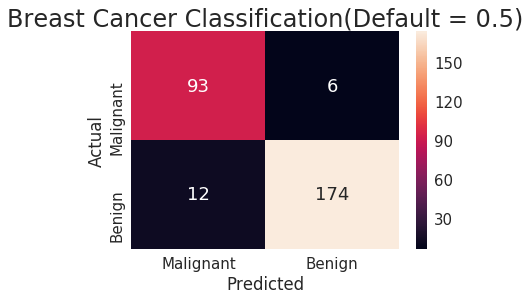

In [7]:
predicted = gbtc.predict(X_test)
confusion(y_test.reshape(y_test.shape[0]), predicted, ['Malignant', 'Benign'], 2,\
          'Breast Cancer Classification(Default = 0.5)')

The above code cell shows the confusion matrix for default case(cut-off=0.5).<br> 

In the case shown below, we are catching 2 extra cases where tumour was Malignant.We have a cutoff value which will have a higher probability of catching Malignant Tumour. The cut-off value is often decided based on the needs and there is no definite rule for deciding the cut-off.

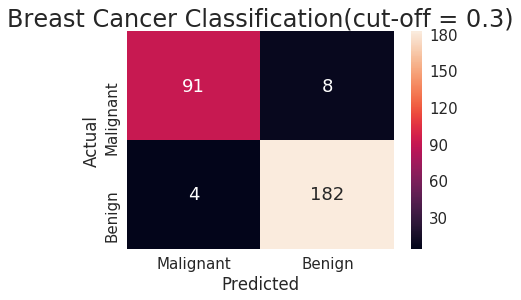

In [8]:
predicted = prediction(gbtc, X_test, 0.3)
confusion(y_test.reshape(y_test.shape[0]), predicted, ['Malignant', 'Benign'], 2, \
          'Breast Cancer Classification(cut-off = 0.3)')

# Problem 3

We will be using Hitters dataset which contains player information including his performance and salary for Major League Baseball from the 1986 and 1987 seasons. This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

We will try to predict the Salary of players based on the factors available to us(information like Number of Hits, Number of Home Runs, etc.) in the dataset.

We will create a function to return 2 different models created using Gradient Boosting and Adaboost and the respective RMSE values returned by them.

In [9]:
wage = pd.read_csv('/home/data_scientist/data/misc/wages.csv')

y, x = pts.dmatrices('Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years +' +
                     'CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + C(League) +' + 
                     'C(Division) + PutOuts + Assists + Assists + C(NewLeague)' ,
                     data=wage, return_type='dataframe')



In [10]:
frac = 0.4

# Split data intro training:testing data set
ind_train_m, ind_test_m, dep_train_m, dep_test_m = \
    train_test_split(x, y, test_size=frac, random_state=23)

def Regressor(shrinkage, trees, test_independent, test_dependent):
    
    '''
    Create and fit Regression models using Gradient Boosting and Adaboost on training set using random_state=40 and 
    learning_rate and n_estimators as parameters for both the models. Then use the predicted value from the above 
    models to find rmse values for predictions made using Gradient Boosting and Adaboost respectively.

    Parameters
    ----------
    shrinkage : learning rate
    trees : number of trees to be constructed
    test_independent : test data set features(independent variables)
    test_dependent : variable from test data set to be predicted(dependent variables)
    
    Returns
    -------
    A tuple of 4 containing Gradient Boosting and Adaboost models and the rmse values fitted using these 2 models. 
    '''

    # YOUR CODE HERE
    gbc = GradientBoostingRegressor(learning_rate=shrinkage, n_estimators=trees, random_state=40)
    abc = AdaBoostRegressor(learning_rate=shrinkage, n_estimators=trees, random_state=40)
    
    gbc = gbc.fit(ind_train_m, dep_train_m)
    abc = abc.fit(ind_train_m, dep_train_m)
    
    gbc_pred = gbc.predict(test_independent)
    abc_pred = abc.predict(test_independent)
    
    gbc_rmse = mean_squared_error(test_dependent, gbc_pred) ** 0.5
    abc_rmse = mean_squared_error(test_dependent, abc_pred) ** 0.5

    return gbc, abc, gbc_rmse, abc_rmse
    

In [11]:
gbm, ada, rmse_gbm, rmse_ada = Regressor(0.01, 500, ind_test_m, dep_test_m)
assert_equal(isinstance(gbm, GradientBoostingRegressor),True)
assert_equal(isinstance(ada, AdaBoostRegressor),True)
assert_equal(round(rmse_gbm,2), 327.06)
assert_equal(round(rmse_ada,2), 328.27)





The code cell below shows 2 different cases:

- Case 1 : Gradient Boosting performs better than Adaboost.
- Case 2 : Adaboost performs better than Gradient Boosting.

This shows that a we need to tune the model properly to achieve the best results.

In [12]:
gbm, ada, rmse_gbm1, rmse_ada1 = Regressor(0.01,500, ind_test_m, dep_test_m)
gbm, ada, rmse_gbm2, rmse_ada2 = Regressor(0.1,100, ind_test_m, dep_test_m)

# Display metrics
print(f'Mean Squared Error(GBM1)         = {rmse_gbm1:4.2f}')
print(f'Mean Squared Error(Adaboost1)    = {rmse_ada1:4.2f}')
print(f'Mean Squared Error(GBM2)         = {rmse_gbm2:4.2f}')
print(f'Mean Squared Error(Adaboost2)    = {rmse_ada2:4.2f}')


Mean Squared Error(GBM1)         = 327.06
Mean Squared Error(Adaboost1)    = 328.27
Mean Squared Error(GBM2)         = 335.12
Mean Squared Error(Adaboost2)    = 326.32
